In [9]:
from typing import Tuple
import logging
import argparse

import numpy as np
from scipy import io

from src.feature_map import feature_map_on_dset
from src.QM7Dataset import load_QM7
from src.ridge_regression import svd_solve
from src.logging_utils import write_result_to_file, FMT, TIMEFMT
from src.plotting_utils import visualize_array
import matplotlib.pyplot as plt

In [2]:
train_dset, _, _ = load_QM7('data/qm7/qm7.mat', n_train=1_000, n_test=1_000, validation_set_fraction=0.1)

In [3]:
train_dset.align_coords()

In [6]:
random_weights = np.random.normal(size=(20, 3), scale=0.1).astype(np.float32)

In [7]:
train_random_features = feature_map_on_dset(train_dset.aligned_coords, 
                                            train_dset.charges, 
                                            train_dset.n_atoms, 
                                            random_weights, 
                                            True)

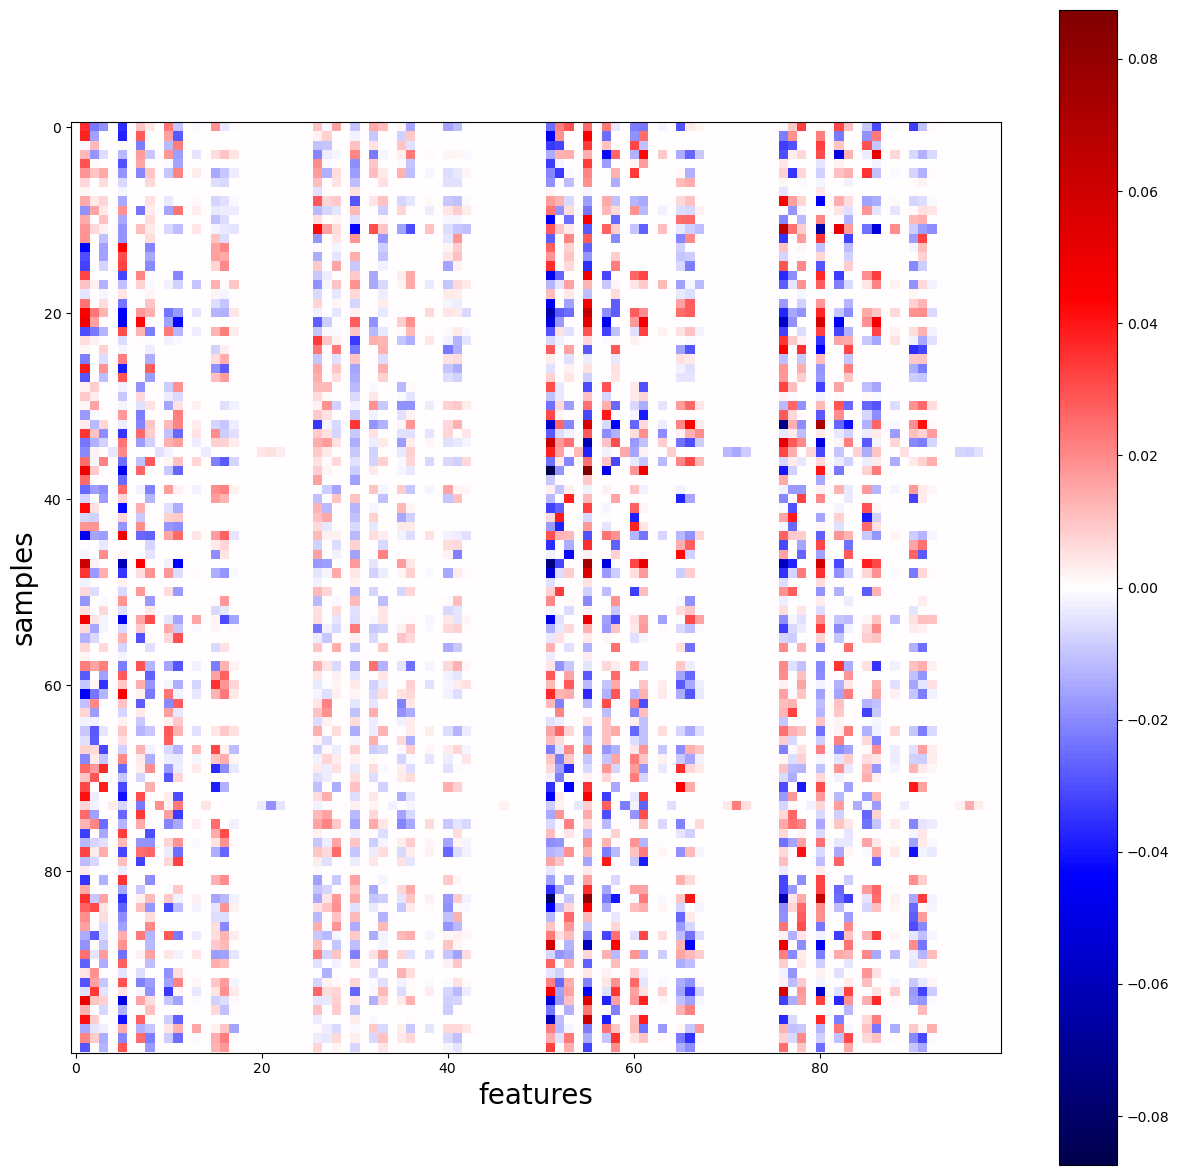

<Figure size 640x480 with 0 Axes>

In [11]:
visualize_array(train_random_features[:100, :100])

In [2]:
df = pd.read_table('data/results/2023-03-09_hyperparam_opt_0.txt')

In [3]:
df.head()

,l2_reg,max_singular_val,min_singular_val,n_features,n_test,n_train,n_val,random_weights_scale,test_MAE,train_MAE,val_MAE
0,0.000000e+00,12696.264,0.000028,2000,1433,5159,573,0.1,103.785160,84.621544,89.860245
1,1.000000e-07,12696.264,0.000028,2000,1433,5159,573,0.1,84.432106,67.799420,72.912110
2,1.000000e-06,12696.264,0.000028,2000,1433,5159,573,0.1,49.616210,38.098460,48.786980
3,1.000000e-05,12696.264,0.000028,2000,1433,5159,573,0.1,44.431587,37.111732,44.806496
4,1.000000e-04,12696.264,0.000028,2000,1433,5159,573,0.1,43.067863,37.220780,41.534340


In [4]:
df.columns

Index(['l2_reg', 'max_singular_val', 'min_singular_val', 'n_features',
       'n_test', 'n_train', 'n_val', 'random_weights_scale', 'test_MAE',
       'train_MAE', 'val_MAE'],
      dtype='object')

In [5]:
keep_cols = ['l2_reg', 'n_features',
      'random_weights_scale', 'test_MAE',
       'train_MAE', 'val_MAE']

In [7]:
df[keep_cols].sort_values('val_MAE', ascending=True)

,l2_reg,n_features,random_weights_scale,test_MAE,train_MAE,val_MAE
77,0.00100,500,0.1,4.288420e+01,37.873062,3.948385e+01
76,0.00010,500,0.1,4.383784e+01,36.978330,3.961975e+01
75,0.00001,500,0.1,4.516278e+01,36.432056,3.966026e+01
6,0.01000,2000,0.1,4.106118e+01,37.484290,3.991041e+01
59,0.00001,200,0.1,4.196707e+01,37.275480,4.019074e+01
...,...,...,...,...,...,...
80,0.00000,500,10.0,5.319901e+05,138.553480,5.635696e+05
24,0.00000,100,1.0,5.910431e+05,66.600080,9.640058e+05
40,0.00000,200,1.0,5.188146e+05,64.050026,1.089526e+06
32,0.00000,100,10.0,4.022013e+06,128.587950,3.572629e+06
